In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from swarm_sim import *

from IPython.display import display

%matplotlib inline 

## Transformation des données en graphe

Import du CSV et mise en forme des données  
Chaque satellite a ses coordonnées sur 3 lignes (coordonnées x, y et z) et chaque colonne indique son déplacement dans le temps

In [14]:
PATH = 'Traces.csv'

df = pd.read_csv(PATH, sep=',', header=None)
satellites = {}

for i in range(0,100):
    sat = df.iloc[3*i : 3*i+3].copy()
    sat['coords'] = ['x','y','z']
    satellites[i] = sat.set_index('coords', drop=True)

#affichage du premier satellite
satellites[0]


100
3
10000


Création des graphes en fonction de l'état initial des satellites  
On ajoute un lien entre deux noeuds en fonction de leur distance (trois distances : 20km, 40km, 60km)

In [3]:
RANGE1 = 20000
RANGE2 = 40000
RANGE3 = 60000

list_satellites = []

for i in range(len(satellites)):
    obj_sat = Node.__new__(Node)
    obj_sat.__init__(i, satellites[i][0][0], satellites[i][0][1], satellites[i][0][2])
    list_satellites.append(obj_sat)

swarm = Swarm.__new__(Swarm)
swarm.__init__(RANGE1, list_satellites)
graph1 = swarm.swarm_to_nxgraph()

swarm.__init__(RANGE2, list_satellites)
graph2 = swarm.swarm_to_nxgraph()

swarm.__init__(RANGE3, list_satellites)
graph3 = swarm.swarm_to_nxgraph()


/tmp/ipykernel_73727/3195517332.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obj_sat.__init__(i, satellites[i][0][0], satellites[i][0][1], satellites[i][0][2])


## Affichage des graphes obtenus à l'état initial

In [4]:
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
def afficher_graphe(graph):
    fig, ax = plt.subplots(figsize=(15, 9))
    ax.axis("off")
    nx.draw_networkx(graph, pos=nx.random_layout(graph1), ax=ax, **plot_options)

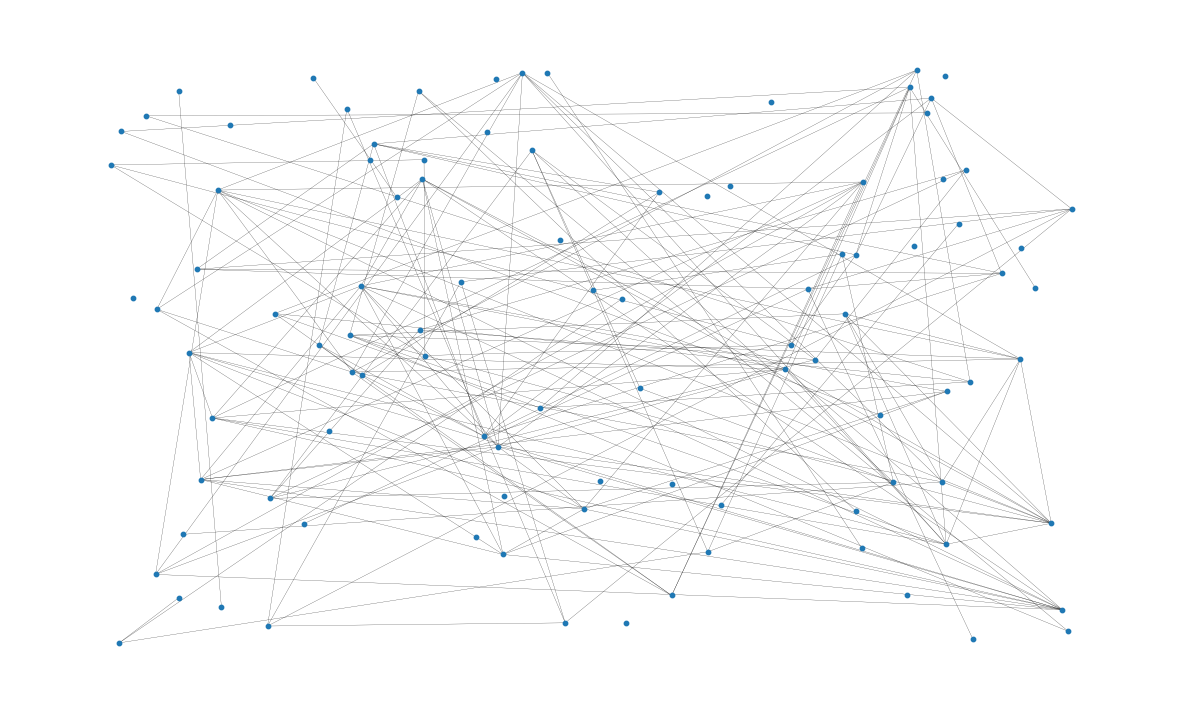

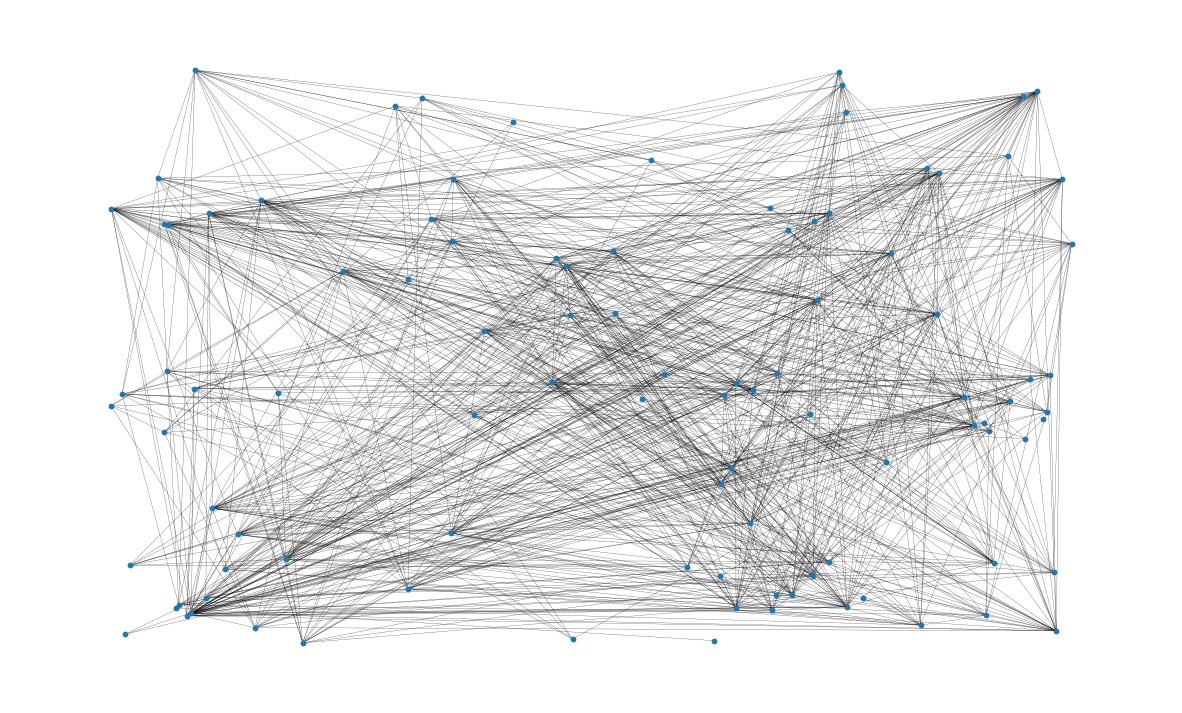

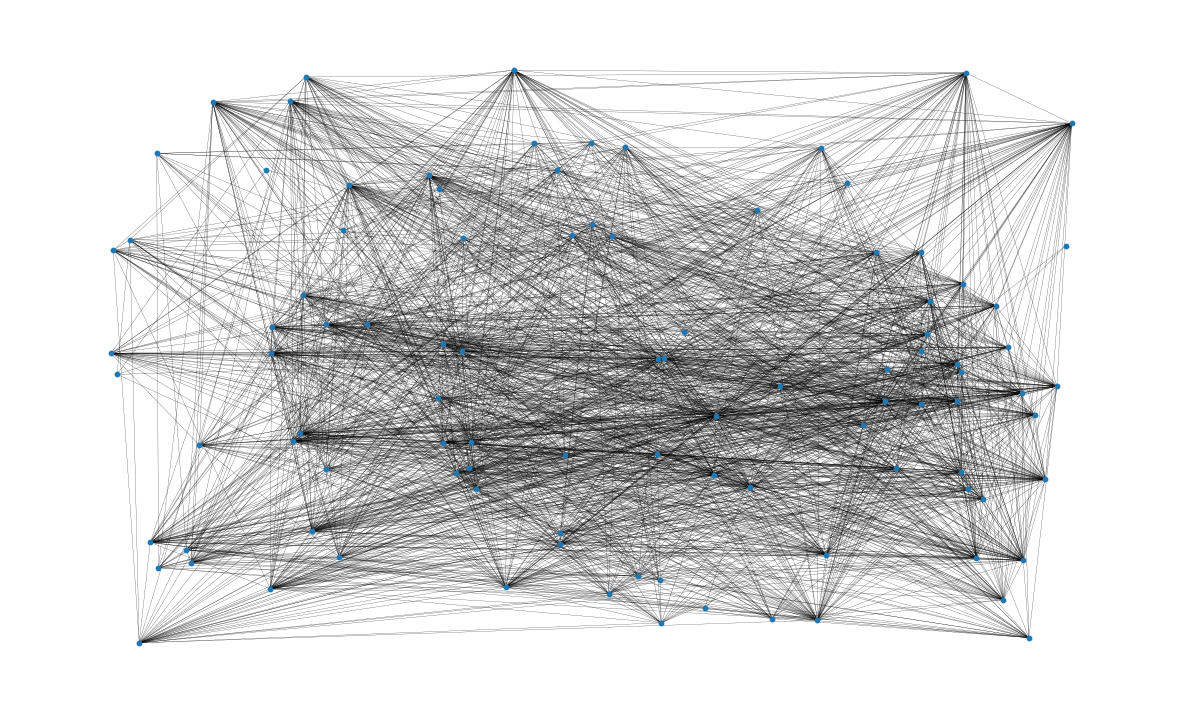

In [5]:
afficher_graphe(graph1) #arc si distance < 20km
afficher_graphe(graph2) #arc si distance < 40km
afficher_graphe(graph3) #arc si distance < 60km

Ici, on a affiché les noeuds du graphe selon une position aléatoire. On remarque bien que plus on allège la contrainte de distance (passage de 20km à 60km), plus le graphe devient fortement connecté, jusqu'à devenir connexe.  
    
On va maintenant afficher le graphe en utilisant un "spring_layout", qui positionne chaque noeud en fonction des autres et des arcs les reliant.

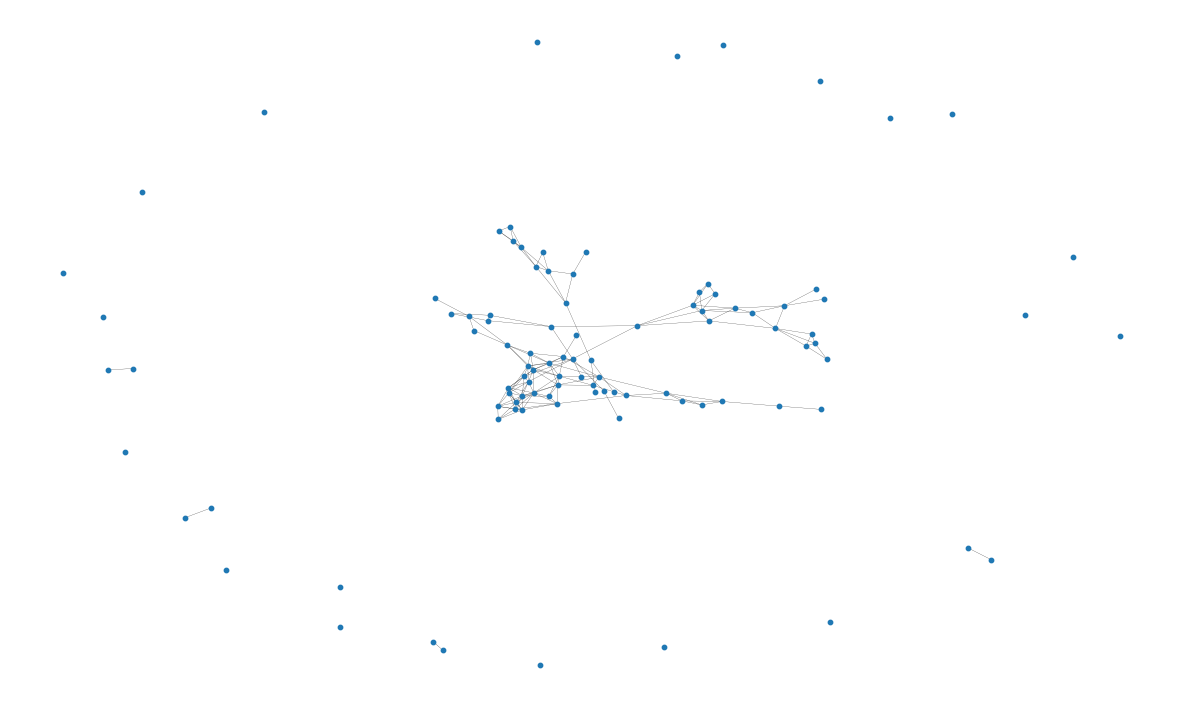

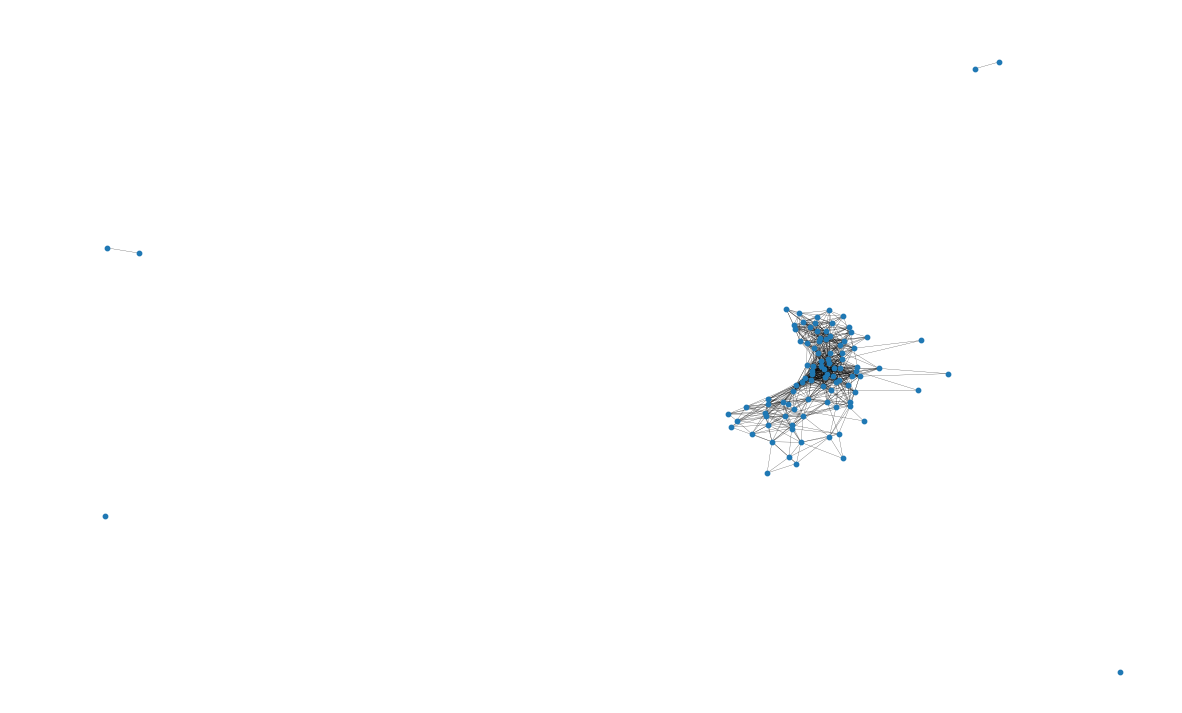

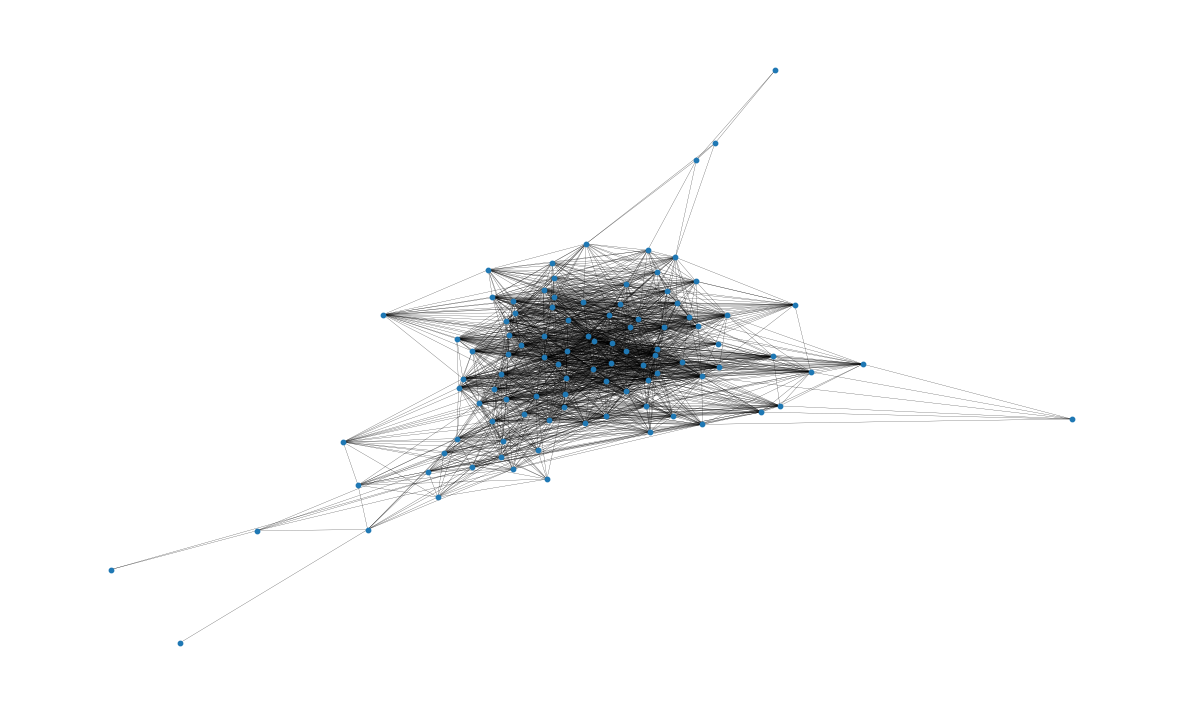

In [6]:
def afficher_graphe_avec_layout(graph):
    pos = nx.spring_layout(graph)
    fig, ax = plt.subplots(figsize=(15, 9))
    ax.axis("off")
    nx.draw_networkx(graph, pos=pos, ax=ax, **plot_options)

afficher_graphe_avec_layout(graph1) #arc si distance < 20km
afficher_graphe_avec_layout(graph2) #arc si distance < 40km
afficher_graphe_avec_layout(graph3) #arc si distance < 60km

## Analyse des graphes à l'état initial

Graphe 1 (20km)

In [7]:
print("Nombre d'arcs ", graph1.number_of_edges())
print("Nombre de noeuds ", graph1.number_of_nodes())
print("Degré moyen des noeuds ", np.mean([d for _, d in graph1.degree()]))

Nombre d'arcs  174
Nombre de noeuds  100
Degré moyen des noeuds  3.48


Graphe 2 (40km)

In [8]:
print("Nombre d'arcs ", graph2.number_of_edges())
print("Nombre de noeuds ", graph2.number_of_nodes())
print("Degré moyen des noeuds ", np.mean([d for _, d in graph2.degree()]))

Nombre d'arcs  883
Nombre de noeuds  100
Degré moyen des noeuds  17.66


Graphe 3 (60km)

In [9]:
print("Nombre d'arcs ", graph3.number_of_edges())
print("Nombre de noeuds ", graph3.number_of_nodes())
print("Degré moyen des noeuds ", np.mean([d for _, d in graph3.degree()]))

Nombre d'arcs  1958
Nombre de noeuds  100
Degré moyen des noeuds  39.16


In [10]:
def afficher_shortest_paths(graph):
    shortest_paths = dict(nx.all_pairs_shortest_path_length(graph))
    df = pd.DataFrame(shortest_paths).fillna("∞") 
    display(df)

afficher_shortest_paths(graph1) #arc si distance < 20km
afficher_shortest_paths(graph2) #arc si distance < 40km
afficher_shortest_paths(graph3) #arc si distance < 60km

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,5.0,∞,∞,∞,4.0,4.0,3.0,6.0,3.0,...,3.0,∞,∞,∞,4.0,1.0,∞,4.0,∞,∞
19,1.0,4.0,∞,∞,∞,3.0,3.0,2.0,5.0,2.0,...,2.0,∞,∞,∞,3.0,1.0,∞,3.0,∞,∞
95,1.0,5.0,∞,∞,∞,4.0,4.0,3.0,6.0,3.0,...,3.0,∞,∞,∞,4.0,0.0,∞,4.0,∞,∞
70,2.0,3.0,∞,∞,∞,2.0,2.0,2.0,4.0,1.0,...,1.0,∞,∞,∞,3.0,2.0,∞,3.0,∞,∞
73,2.0,4.0,∞,∞,∞,3.0,3.0,1.0,5.0,1.0,...,2.0,∞,∞,∞,2.0,2.0,∞,2.0,∞,∞
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,...,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞
86,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,...,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞
88,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,...,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞
93,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,...,∞,∞,∞,0.0,∞,∞,∞,∞,∞,∞


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,2.0,2.0,∞,2.0,2.0,2.0,1.0,3.0,1.0,...,2.0,3.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,3.0
33,1.0,1.0,2.0,∞,2.0,1.0,1.0,1.0,2.0,1.0,...,1.0,4.0,4.0,3.0,2.0,1.0,3.0,1.0,3.0,2.0
97,1.0,2.0,2.0,∞,2.0,1.0,2.0,1.0,3.0,1.0,...,1.0,3.0,3.0,3.0,1.0,2.0,2.0,0.0,2.0,2.0
70,1.0,1.0,2.0,∞,2.0,1.0,1.0,1.0,2.0,1.0,...,1.0,4.0,4.0,2.0,2.0,1.0,3.0,1.0,3.0,2.0
7,1.0,2.0,2.0,∞,2.0,1.0,2.0,0.0,2.0,1.0,...,1.0,3.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,∞,∞,∞,1.0,∞,∞,∞,∞,∞,∞,...,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞
34,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,...,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞
53,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,...,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞
85,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,...,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,2,1,3,2,1,2,1,2,1,...,1,2,2,2,1,1,2,1,2,2
2,1,2,0,4,2,1,2,1,2,2,...,1,2,2,3,1,1,1,1,1,1
5,1,1,1,3,2,0,1,1,2,1,...,1,2,2,2,1,1,1,1,2,1
7,1,1,1,3,1,1,1,0,1,1,...,1,2,2,2,1,1,2,1,2,2
9,1,1,2,3,1,1,1,1,1,0,...,1,3,2,2,1,1,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,3,4,2,5,4,3,4,3,4,3,...,3,2,3,5,3,3,2,3,2,2
85,3,3,2,5,4,2,3,3,4,3,...,3,2,3,4,3,3,2,2,1,2
88,3,3,2,5,3,2,3,3,4,3,...,3,1,2,4,2,3,2,2,1,2
86,4,3,5,1,4,4,3,4,3,4,...,4,6,5,2,4,4,5,4,6,5


Comme le dernier graphe (distance <60km) est connexe, il existe un plus court chemin pour n'importe quel couple de noeud. Il est alors possible de calculer son diamètre (la valeur max des plus courts chemins) ainsi que la moyenne des plus courts chemins :

In [11]:
print("Diamètre du graphe 3 : ", nx.diameter(graph3)) 
print("Moyenne des plus courts chemins du graphe 3 : ", nx.average_shortest_path_length(graph3)) 

Diamètre du graphe 3 :  7
Moyenne des plus courts chemins du graphe 3 :  1.881010101010101


Pour le troisième graphe, il faut donc parcourir maximum 7 noeuds pour aller d'un noeud A à un noeud B. Dans le cadre des satellites, pour qu'un message soit envoyé depuis un satellite A vers n'importe quel satellite B, il faudra au maximum utiliser 7 satellites (il faudra passer au maximum par 5 satellites intermédiaires entre A et B).

En moyenne, un message envoyé par un satellite A vers un satellite B passera par 1.8 satellite (soit environ 1 intermédiaire en moyenne).

## Evolution des satellites dans le temps

In [15]:
#Création des graphes

graphs20 = []
graphs40 = []
graphs60 = []

for i in range(satellites[0].shape[1]): #on itere dans le temps
    list_satellites = []
    for j in range(len(satellites)):
        obj_sat = Node.__new__(Node)
        obj_sat.__init__(j, satellites[j][i][0], satellites[j][i][1], satellites[j][i][2])
        list_satellites.append(obj_sat)
    
    swarm.__init__(RANGE1, list_satellites)
    graphs20.append(swarm.swarm_to_nxgraph())

    swarm.__init__(RANGE2, list_satellites)
    graphs40.append(swarm.swarm_to_nxgraph())

    swarm.__init__(RANGE3, list_satellites)
    graphs60.append(swarm.swarm_to_nxgraph())


/tmp/ipykernel_73727/2702850851.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obj_sat.__init__(j, satellites[j][i][0], satellites[j][i][1], satellites[j][i][2])


In [22]:
# Analyse des caractéristiques dans le temps
df_edges = pd.DataFrame({
    "nb_edges20": [g.number_of_edges() for g in graphs20],
    "nb_edges40": [g.number_of_edges() for g in graphs40],
    "nb_edges60": [g.number_of_edges() for g in graphs60]
})

display(df_edges)

,nb_edges20,nb_edges40,nb_edges60
0,174,883,1958
1,174,881,1952
2,170,880,1951
3,168,875,1953
4,169,876,1956
...,...,...,...
9995,101,599,1471
9996,100,597,1474
9997,100,598,1473
9998,99,599,1473
